In [1]:
import dsmanipulator.dsloader as dsl
import dsmanipulator.dscreator as dsc
import dsmanipulator.dsanalyzer as dsa

from dsmanipulator.utils.dataobjects import FileColumnNames


from bidict import bidict
import numpy as np

In [2]:
col_names = FileColumnNames("TimeStamp", "Relative Time", "srcIP", "dstIP", "srcPort", "dstPort")
%time df = dsl.load_data("data/mega104-17-12-18-ioa.csv", col_names)
%time df = dsc.add_relative_days(df)
%time df = dsc.convert_to_timeseries(df)
%time df = dsc.add_communication_id_l3(df)
%time df = dsc.add_communication_id_l4(df)
%time df = dsc.add_communication_direction(df, "192.168.11.111")
%time df = dsc.add_inter_arrival_time_ad(df)
%time df = dsc.add_inter_arrival_time_sd(df)

CPU times: user 2.85 s, sys: 62.7 ms, total: 2.92 s
Wall time: 2.94 s
CPU times: user 7.49 ms, sys: 0 ns, total: 7.49 ms
Wall time: 7.15 ms
CPU times: user 12.5 ms, sys: 60 µs, total: 12.6 ms
Wall time: 12.3 ms
CPU times: user 124 ms, sys: 8.25 ms, total: 132 ms
Wall time: 142 ms
CPU times: user 115 ms, sys: 30.7 ms, total: 146 ms
Wall time: 145 ms
CPU times: user 0 ns, sys: 6.23 ms, total: 6.23 ms
Wall time: 5.95 ms
CPU times: user 292 µs, sys: 2.81 ms, total: 3.1 ms
Wall time: 3.01 ms
CPU times: user 0 ns, sys: 6.34 ms, total: 6.34 ms
Wall time: 6.11 ms


In [6]:
df

,relTime,srcIp,dstIp,srcPort,dstPort,ipLen,len,fmt,uType,asduType,...,oa,addr,ioa,relativeDay,l3commId,l4commId,masterToSlave,interArrivalTimeAD,interArrivalTimeSD,count
timeStamp,,,,,,,,,,,,,,,,,,,,,
2022-02-11 14:41:44.980,7.988096,192.168.11.111,192.168.11.248,61254,2404,46,4,0x00000003,0x00000001,NaN,...,NaN,NaN,NaN,0,2,2,True,0.000000,0.000000,True
2022-02-11 14:41:44.980,7.988457,192.168.11.248,192.168.11.111,2404,61254,46,4,0x00000003,0x00000002,NaN,...,NaN,NaN,NaN,0,1,1,False,0.000361,0.000000,True
2022-02-11 14:41:45.190,8.191193,192.168.11.248,192.168.11.111,2404,61254,90,21,0x00000000,NaN,31,...,0,65535.0,67,0,1,1,False,0.202736,0.202736,True
2022-02-11 14:41:45.190,8.191193,192.168.11.248,192.168.11.111,2404,61254,90,25,0x00000000,NaN,36,...,0,65535.0,2,0,1,1,False,0.000000,0.000000,True
2022-02-11 14:41:48.470,11.477121,192.168.11.248,192.168.11.111,2404,61254,67,25,0x00000000,NaN,36,...,0,65535.0,2,0,1,1,False,3.285928,3.285928,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-14 10:36:32.950,244495.958036,192.168.11.248,192.168.11.111,2404,61254,67,25,0x00000000,NaN,36,...,0,65535.0,2,3,1,1,False,8.402325,8.402325,True
2022-02-14 10:36:34.970,244497.977239,192.168.11.111,192.168.11.248,61254,2404,46,4,0x00000001,NaN,NaN,...,NaN,NaN,NaN,3,2,2,True,2.019203,15.490532,True
2022-02-14 10:36:35.750,244498.756241,192.168.11.248,192.168.11.111,2404,61254,67,25,0x00000000,NaN,36,...,0,65535.0,2,3,1,1,False,0.779002,2.798205,True


In [5]:
b = dsc.expand_values_to_columns(df, 'asduType')
b

,relTime,srcIp,dstIp,srcPort,dstPort,ipLen,len,fmt,uType,asduType,...,ioa,relativeDay,l3commId,l4commId,masterToSlave,interArrivalTimeAD,interArrivalTimeSD,count,asduType:31,asduType:36
timeStamp,,,,,,,,,,,,,,,,,,,,,
2022-02-11 14:41:44.980,7.988096,192.168.11.111,192.168.11.248,61254,2404,46,4,0x00000003,0x00000001,NaN,...,NaN,0,2,2,True,0.000000,0.000000,True,False,False
2022-02-11 14:41:44.980,7.988457,192.168.11.248,192.168.11.111,2404,61254,46,4,0x00000003,0x00000002,NaN,...,NaN,0,1,1,False,0.000361,0.000000,True,False,False
2022-02-11 14:41:45.190,8.191193,192.168.11.248,192.168.11.111,2404,61254,90,21,0x00000000,NaN,31,...,67,0,1,1,False,0.202736,0.202736,True,True,False
2022-02-11 14:41:45.190,8.191193,192.168.11.248,192.168.11.111,2404,61254,90,25,0x00000000,NaN,36,...,2,0,1,1,False,0.000000,0.000000,True,False,True
2022-02-11 14:41:48.470,11.477121,192.168.11.248,192.168.11.111,2404,61254,67,25,0x00000000,NaN,36,...,2,0,1,1,False,3.285928,3.285928,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-14 10:36:32.950,244495.958036,192.168.11.248,192.168.11.111,2404,61254,67,25,0x00000000,NaN,36,...,2,3,1,1,False,8.402325,8.402325,True,False,True
2022-02-14 10:36:34.970,244497.977239,192.168.11.111,192.168.11.248,61254,2404,46,4,0x00000001,NaN,NaN,...,NaN,3,2,2,True,2.019203,15.490532,True,False,False
2022-02-14 10:36:35.750,244498.756241,192.168.11.248,192.168.11.111,2404,61254,67,25,0x00000000,NaN,36,...,2,3,1,1,False,0.779002,2.798205,True,False,True


,count
timeStamp,
2022-02-11 14:00:00,320
2022-02-11 15:00:00,1011
2022-02-11 16:00:00,1053
2022-02-11 17:00:00,1061
2022-02-11 18:00:00,1011
...,...
2022-02-14 06:00:00,982
2022-02-14 07:00:00,1080
2022-02-14 08:00:00,1037


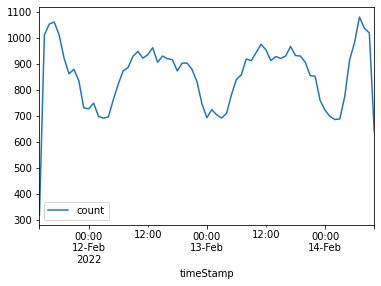

In [4]:
df['count'] = True
x = df.loc[:,['count']]
x = x.resample('1h').sum()
x.plot()
x

In [ ]:
df.query("")